### MLP2: Data Preprocessing and Exploratory Analysis 


#### Write your name

- xiaomei Xie
- Lili Hao


#### Overview:  This dataset is all about flights in the united states, including information about the number, length, and type of delays. The data is reported for individual months at every major airport for every carrier.


### (a) Datasets (10 pts)

In [1]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import os
datapath = os.path.join("../rawdata","")  
datapath

'../rawdata\\'

#### Load the data into a DataFrame

In [3]:

# Load the data
df = pd.read_csv(datapath + "airlines.csv", thousands=',')
df.shape

(4408, 24)

In [4]:
df.head(5)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [5]:
df.tail(5)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116
4407,TPA,"Tampa, FL: Tampa International",2016/01,1,January,2016,410,342,312,2,...,1095,7,4748,5996,22557,21164,11423,37,57774,2593


In [6]:
columns = df.columns
columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

In [8]:
df.describe()

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


### (b) Data preprocessing (10 pts) 

##### rename columns for easier query 

In [9]:
df.rename(columns = {'Statistics.# of Delays.Carrier':'# of Delays.Carrier',
                      'Statistics.# of Delays.Late Aircraft':'# of Delays.Late Aircraft',
                      'Statistics.# of Delays.National Aviation System':'# of Delays.National Aviation System',
                      'Statistics.# of Delays.Security':'# of Delays.Security',
                      'Statistics.# of Delays.Weather':'# of Delays.Weather',
                      'Statistics.Carriers.Total':'Carriers.Total',
                      'Statistics.Flights.Cancelled':'Flights.Cancelled',
                      'Statistics.Flights.Delayed':'Flights.Delayed',
                      'Statistics.Flights.Diverted':'Flights.Diverted',
                      'Statistics.Flights.On Time':'Flights.On Time',
                       'Statistics.Flights.Total':'Flights.Total',
                      'Statistics.Minutes Delayed.Carrier':'Minutes Delayed.Carrier',
                      'Statistics.Minutes Delayed.Late Aircraft':'Minutes Delayed.Late Aircraft',
                       'Statistics.Minutes Delayed.National Aviation System': 'Minutes Delayed.National Aviation System',
                      'Statistics.Minutes Delayed.Security':'Minutes Delayed.Security',
                      'Statistics.Minutes Delayed.Total':'Minutes Delayed.Total',
                       'Statistics.Minutes Delayed.Weather': 'Minutes Delayed.Weather'
                    }, inplace = True) 

In [10]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather'],
      dtype='object')

In [11]:
df.isnull().sum()

Airport.Code                                0
Airport.Name                                0
Time.Label                                  0
Time.Month                                  0
Time.Month Name                             0
Time.Year                                   0
# of Delays.Carrier                         0
# of Delays.Late Aircraft                   0
# of Delays.National Aviation System        0
# of Delays.Security                        0
# of Delays.Weather                         0
Statistics.Carriers.Names                   0
Carriers.Total                              0
Flights.Cancelled                           0
Flights.Delayed                             0
Flights.Diverted                            0
Flights.On Time                             0
Flights.Total                               0
Minutes Delayed.Carrier                     0
Minutes Delayed.Late Aircraft               0
Minutes Delayed.National Aviation System    0
Minutes Delayed.Security          

In [12]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

<AxesSubplot:title={'center':'Minutes Delayed.Carrier'}, xlabel='Time.Year'>

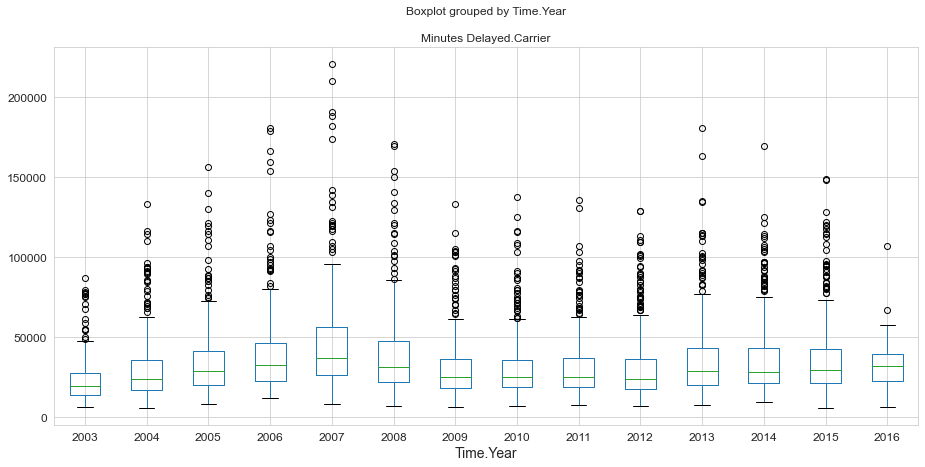

In [13]:
df.boxplot(column='Minutes Delayed.Carrier', by='Time.Year', figsize=(15,7))

<AxesSubplot:>

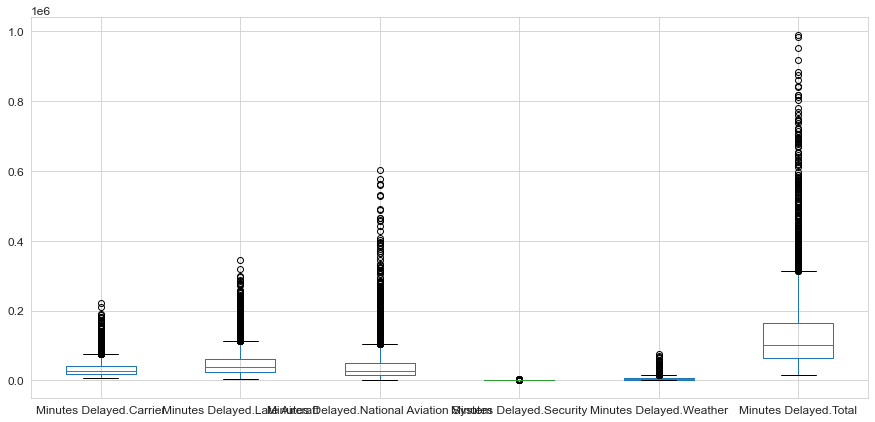

In [14]:
df.boxplot(column=['Minutes Delayed.Carrier',
                   'Minutes Delayed.Late Aircraft',
                   'Minutes Delayed.National Aviation System',
                   'Minutes Delayed.Security',
                   'Minutes Delayed.Weather',
                   'Minutes Delayed.Total'], figsize=(15,7))

In [15]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [16]:
df.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Delayed,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [17]:
from scipy import stats

def delletOutlier(dfBK, col):
    for attr in col:
        dfBK = dfBK[(np.abs(stats.zscore(dfBK[[attr]])) <= 3)]
        #dfBK = dfBK[(np.abs(stats.zscore(dfBK[[attr]])) <= 3).all(axis=0)]
    return dfBK

In [18]:
from scipy import stats

def storeOutlier(outlier, col):
    for attr in col:
        outlier = outlier[(np.abs(stats.zscore(outlier[[attr]])) > 3)]
        #outlier = outlier[(np.abs(stats.zscore(outlier[[attr]])) > 3).all(axis=0)]
    return outlier

In [19]:
dfBK = df.copy()
dfOutlier = df.copy()
dfBK.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Delayed,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160


In [20]:
dfOutlier.shape

(4408, 24)

In [21]:
dfOutlier = storeOutlier(dfOutlier, col)

C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\scipy\stats\stats.py:2497: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\numpy\core\_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [22]:
dfOutlier.shape

(0, 24)

In [23]:
dfBK = delletOutlier(dfBK, col)

print("DfBK without outlier",dfBK.shape)
print("DfOutlier without outlier",dfOutlier.shape)

DfBK without outlier (3367, 24)
DfOutlier without outlier (0, 24)


In [24]:
dfBK.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3367 entries, 1 to 4407
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Airport.Code                              3367 non-null   object
 1   Airport.Name                              3367 non-null   object
 2   Time.Label                                3367 non-null   object
 3   Time.Month                                3367 non-null   int64 
 4   Time.Month Name                           3367 non-null   object
 5   Time.Year                                 3367 non-null   int64 
 6   # of Delays.Carrier                       3367 non-null   int64 
 7   # of Delays.Late Aircraft                 3367 non-null   int64 
 8   # of Delays.National Aviation System      3367 non-null   int64 
 9   # of Delays.Security                      3367 non-null   int64 
 10  # of Delays.Weather                       3367 n

<AxesSubplot:>

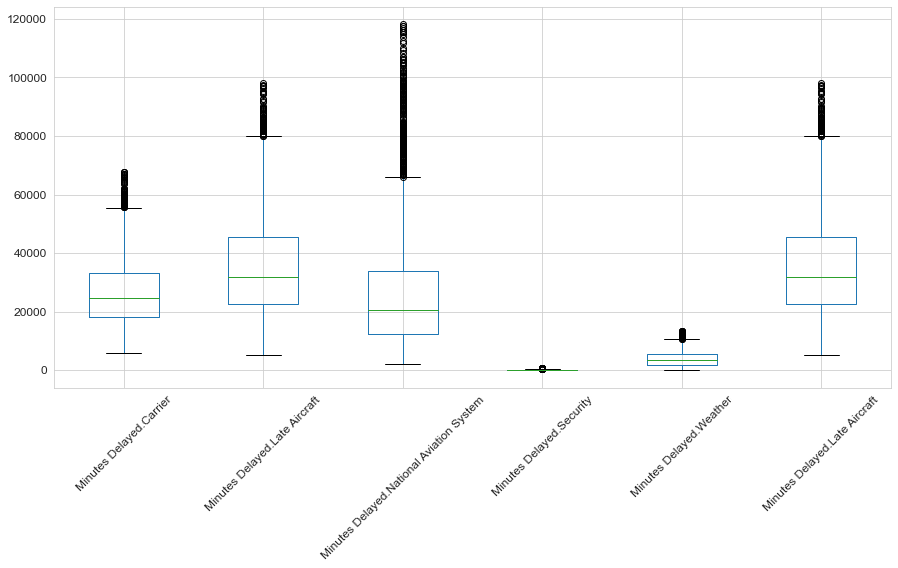

In [25]:
dfBK.boxplot(column=['Minutes Delayed.Carrier',
                        'Minutes Delayed.Late Aircraft',
                        'Minutes Delayed.National Aviation System',
                        'Minutes Delayed.Security',
                        'Minutes Delayed.Weather',
                        'Minutes Delayed.Late Aircraft'], figsize=(15,7), rot = 45)

## additional time trend for total flights and delayed flight
* a yearly decreasing trend
* a seasonality change

<BarContainer object of 4408 artists>

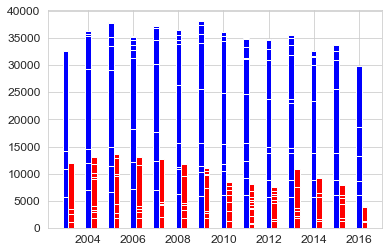

In [26]:
fig,ax0=plt.subplots(nrows=1)
ax0.bar(df['Time.Year'],df['Flights.Total'], color='blue', width = 0.25)
ax0.bar(df['Time.Year'] + 0.25,df['Flights.Delayed'], color = 'r', width = 0.25)

<BarContainer object of 4408 artists>

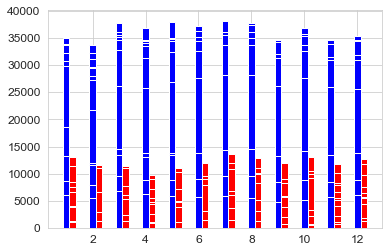

In [27]:
fig,ax0=plt.subplots(nrows=1)
ax0.bar(df['Time.Month'],df['Flights.Total'], color='blue', width = 0.25)
ax0.bar(df['Time.Month'] + 0.25,df['Flights.Delayed'], color = 'r', width = 0.25)

In [28]:
dfBK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3367 entries, 1 to 4407
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Airport.Code                              3367 non-null   object
 1   Airport.Name                              3367 non-null   object
 2   Time.Label                                3367 non-null   object
 3   Time.Month                                3367 non-null   int64 
 4   Time.Month Name                           3367 non-null   object
 5   Time.Year                                 3367 non-null   int64 
 6   # of Delays.Carrier                       3367 non-null   int64 
 7   # of Delays.Late Aircraft                 3367 non-null   int64 
 8   # of Delays.National Aviation System      3367 non-null   int64 
 9   # of Delays.Security                      3367 non-null   int64 
 10  # of Delays.Weather                       3367 n

In [29]:
df.shape

(4408, 24)

In [30]:
dfNormalize = df.copy()

In [31]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']


In [32]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing

In [33]:
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(dfNormalize[col].values)
final_df = pd.DataFrame(scaled_df, columns=col)

In [34]:
final_df.head(2)

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Carriers.Total,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,0.301513,0.270412,0.350472,0.189474,0.403206,0.533333,0.057928,0.414431,0.061086,0.745664,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219
1,0.088067,0.093018,0.069295,0.042105,0.080148,0.733333,0.036715,0.099881,0.006787,0.199287,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621


In [35]:
final_df.to_csv('../processeddata/new_airlines_Normalized.csv', index=False)

In [36]:
nomalDF = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
nomalDF.head(2)

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Carriers.Total,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,0.301513,0.270412,0.350472,0.189474,0.403206,0.533333,0.057928,0.414431,0.061086,0.745664,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219
1,0.088067,0.093018,0.069295,0.042105,0.080148,0.733333,0.036715,0.099881,0.006787,0.199287,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621


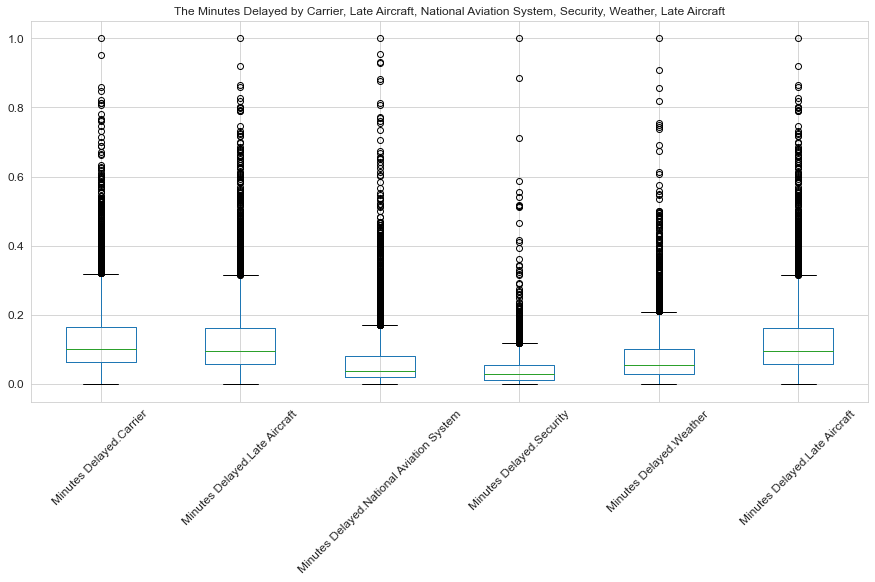

In [37]:
nomalDF.boxplot(column=['Minutes Delayed.Carrier',
                        'Minutes Delayed.Late Aircraft',
                        'Minutes Delayed.National Aviation System',
                        'Minutes Delayed.Security',
                        'Minutes Delayed.Weather',
                        'Minutes Delayed.Late Aircraft'], figsize=(15,7), rot=45)
title_boxplot = 'The Minutes Delayed by Carrier, Late Aircraft, National Aviation System, Security, Weather, Late Aircraft'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

array([[<AxesSubplot:title={'center':'2003'}>,
        <AxesSubplot:title={'center':'2004'}>,
        <AxesSubplot:title={'center':'2005'}>,
        <AxesSubplot:title={'center':'2006'}>],
       [<AxesSubplot:title={'center':'2007'}>,
        <AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2009'}>,
        <AxesSubplot:title={'center':'2010'}>],
       [<AxesSubplot:title={'center':'2011'}>,
        <AxesSubplot:title={'center':'2012'}>,
        <AxesSubplot:title={'center':'2013'}>,
        <AxesSubplot:title={'center':'2014'}>],
       [<AxesSubplot:title={'center':'2015'}>,
        <AxesSubplot:title={'center':'2016'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

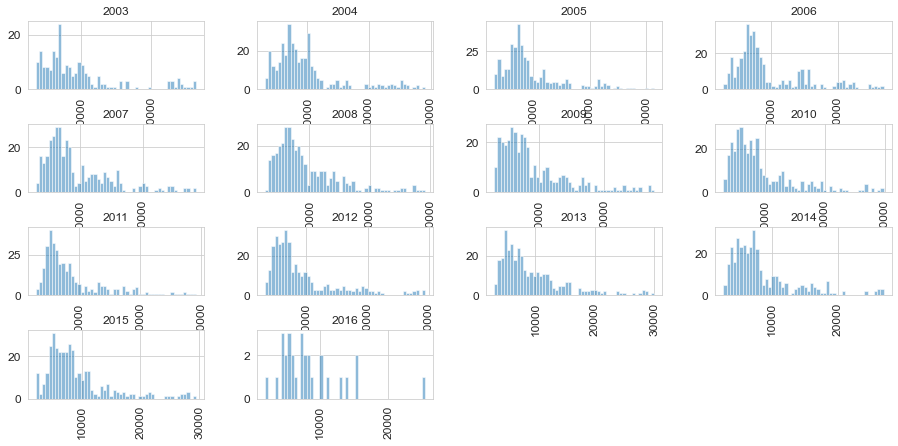

In [38]:
df.hist(column='Flights.On Time', by='Time.Year', bins=50,  alpha=0.5, figsize=(15,7))

### Classify and Set attribute for the dataset

In [39]:
df['Rate'] = (df['Flights.On Time'] / df['Flights.Total'])
df.head(5)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,27,23974,30060,61606,68335,118831,518,268764,19474,0.797538
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,3,7875,9639,20319,28189,24400,99,77167,4160,0.816993
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,15,6998,8287,13635,26810,17556,278,64480,6201,0.844455
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,14,7021,8670,14763,23379,23804,127,65865,3792,0.809804
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,18,5321,6513,13775,13712,20999,120,52747,4141,0.816981


In [40]:
mean = df.Rate.mean()
mean


0.7804595009667558

In [41]:
df.loc[df['Rate'] >0.8, 'Ratio_Rank'] = int(1)
df.loc[df['Rate'] <=0.7, 'Ratio_Rank'] = int(3) 
df.loc[(df['Rate'] <=0.8) &(df['Rate'] >0.7) , 'Ratio_Rank'] = int(2)
df.head(10)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,23974,30060,61606,68335,118831,518,268764,19474,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,7875,9639,20319,28189,24400,99,77167,4160,0.816993,1.0
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,6998,8287,13635,26810,17556,278,64480,6201,0.844455,1.0
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,7021,8670,14763,23379,23804,127,65865,3792,0.809804,1.0
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,5321,6513,13775,13712,20999,120,52747,4141,0.816981,1.0
5,DEN,"Denver, CO: Denver International",2003/06,6,June,2003,516,323,664,11,...,10024,11691,26634,18969,23538,706,75428,5581,0.857412,1.0
6,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2003/06,6,June,2003,986,1390,2147,19,...,22303,27628,70918,80714,90574,683,263521,20632,0.807261,1.0
7,DTW,"Detroit, MI: Detroit Metro Wayne County",2003/06,6,June,2003,376,371,570,6,...,10227,11754,21802,18715,16482,139,60667,3529,0.870087,1.0
8,EWR,"Newark, NJ: Newark Liberty International",2003/06,6,June,2003,322,519,1948,10,...,9441,12506,20190,30905,91048,490,150513,7880,0.754918,2.0
9,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",2003/06,6,June,2003,247,256,427,5,...,3672,4662,12547,14600,14935,141,44303,2080,0.787645,2.0


In [42]:
df.to_csv('../processeddata/new_airlines_Rank.csv', index=False)

### (c) Exploratory data analysis (20 pts) 

additional calculation among related columns

In [43]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 

In [44]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

### the total of the below four columns should be equal to Flights.Total. The result is completely match
* Flights.Cancelled
* Flights.Delayed
* Flights.Diverted
* Flights.On Time

In [45]:
total= df['Flights.Cancelled'] + df['Flights.Delayed'] + df['Flights.Diverted'] + df['Flights.On Time'] 
temp  = df[total != df['Flights.Total']]
print(temp.shape)
#temp

(0, 26)


### the total of these five columns should be equal to Flights.Delayed. There is only 919 rows match. We currently keep the rest row
* '# of Delays.Carrier
* '# of Delays.Late Aircraft
* '# of Delays.National Aviation System
* '# of Delays.Security
* '# of Delays.Weather 

In [46]:
total= df['# of Delays.Carrier'] + df['# of Delays.Late Aircraft'] \
+ df['# of Delays.National Aviation System'] + df['# of Delays.Security'] + df['# of Delays.Weather'] 

temp  = df[total == df['Flights.Delayed']]
print(temp.shape)
#temp

(919, 26)


### the total of these five columns should be equal to Minutes Delayed.Total. However, there is 33 rows are not equal. from the histom gram, we can see those rows are not completely outliers. We currently keep those rows
* Minutes Delayed.Carrier
* Minutes Delayed.Late Aircraft
* Minutes Delayed.National Aviation System
* Minutes Delayed.Security
* Minutes Delayed.Weather

In [47]:
total = df['Minutes Delayed.Carrier'] + df['Minutes Delayed.Late Aircraft'] \
+ df['Minutes Delayed.National Aviation System'] + df['Minutes Delayed.Security'] + df['Minutes Delayed.Weather'] 

temp  = df[total != df['Minutes Delayed.Total']]
print(temp.shape)
#temp

(33, 26)


<AxesSubplot:title={'center':'Minutes Delayed.Carrier'}, xlabel='Time.Year'>

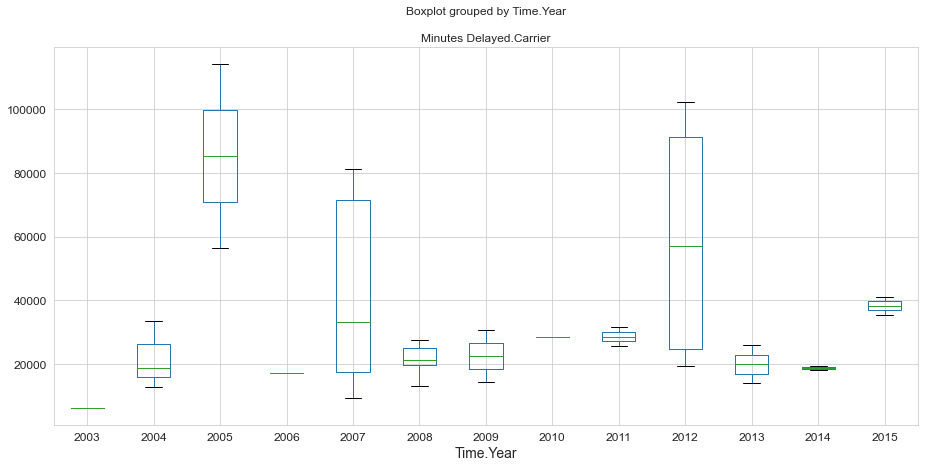

In [48]:
temp.boxplot(column='Minutes Delayed.Carrier', by='Time.Year', figsize=(15,7))

### additional time trend for total flights and delayed flight
* a yearly decreasing trend
* a seasonality change

<BarContainer object of 4408 artists>

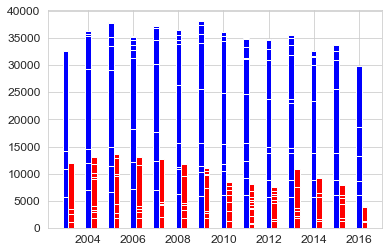

In [49]:
fig,ax0=plt.subplots(nrows=1)
ax0.bar(df['Time.Year'],df['Flights.Total'], color='blue', width = 0.25)
ax0.bar(df['Time.Year'] + 0.25,df['Flights.Delayed'], color = 'r', width = 0.25)

<BarContainer object of 4408 artists>

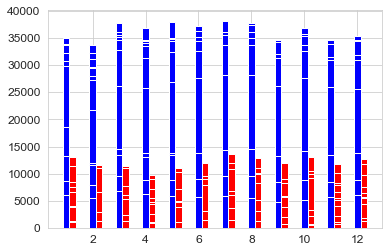

In [50]:
fig,ax0=plt.subplots(nrows=1)
ax0.bar(df['Time.Month'],df['Flights.Total'], color='blue', width = 0.25)
ax0.bar(df['Time.Month'] + 0.25,df['Flights.Delayed'], color = 'r', width = 0.25)

In [51]:
df.corr()

,Time.Month,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Carriers.Total,Flights.Cancelled,Flights.Delayed,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
Time.Month,1.000000,-0.075977,-0.008749,-0.021178,-0.010177,0.044398,-0.063141,0.009466,-0.132985,-0.016750,...,0.024357,0.009119,-0.019420,-0.027362,-0.008659,0.043901,-0.021451,-0.065504,0.098220,-0.075162
Time.Year,-0.075977,1.000000,-0.067204,0.000373,-0.195279,-0.315334,-0.191346,-0.483083,-0.046951,-0.127542,...,-0.052625,-0.074740,0.028561,0.026476,-0.150661,-0.249772,-0.069273,-0.134033,0.117311,-0.107713
# of Delays.Carrier,-0.008749,-0.067204,1.000000,0.872725,0.648211,0.407397,0.729619,0.333489,0.518305,0.861985,...,0.758744,0.829259,0.952155,0.836543,0.532933,0.380787,0.798300,0.708586,-0.313528,0.290468
# of Delays.Late Aircraft,-0.021178,0.000373,0.872725,1.000000,0.703330,0.312898,0.684675,0.268856,0.608284,0.906646,...,0.741917,0.831632,0.894121,0.979729,0.626905,0.297629,0.881326,0.697966,-0.372199,0.333227
# of Delays.National Aviation System,-0.010177,-0.195279,0.648211,0.703330,1.000000,0.216732,0.731453,0.263649,0.655539,0.927546,...,0.590919,0.721083,0.691461,0.730317,0.956954,0.243707,0.920091,0.698585,-0.549201,0.478571
# of Delays.Security,0.044398,-0.315334,0.407397,0.312898,0.216732,1.000000,0.278034,0.235272,0.117530,0.313698,...,0.258856,0.285214,0.297827,0.263751,0.148077,0.868281,0.244291,0.249887,-0.144150,0.140389
# of Delays.Weather,-0.063141,-0.191346,0.729619,0.684675,0.731453,0.278034,1.000000,0.234537,0.586373,0.804410,...,0.556228,0.660898,0.755613,0.697096,0.659647,0.280510,0.787211,0.962323,-0.468247,0.429300
Carriers.Total,0.009466,-0.483083,0.333489,0.268856,0.263649,0.235272,0.234537,1.000000,0.160970,0.305701,...,0.280551,0.301617,0.250009,0.223946,0.198423,0.203467,0.241707,0.200550,-0.145978,0.122690
Flights.Cancelled,-0.132985,-0.046951,0.518305,0.608284,0.655539,0.117530,0.586373,0.160970,1.000000,0.678981,...,0.413247,0.535110,0.591412,0.656723,0.675313,0.138741,0.726973,0.626871,-0.511536,0.449712
Flights.Delayed,-0.016750,-0.127542,0.861985,0.906646,0.927546,0.313698,0.804410,0.305701,0.678981,1.000000,...,0.733519,0.851394,0.883851,0.907936,0.853660,0.317777,0.974404,0.785264,-0.499645,0.442623


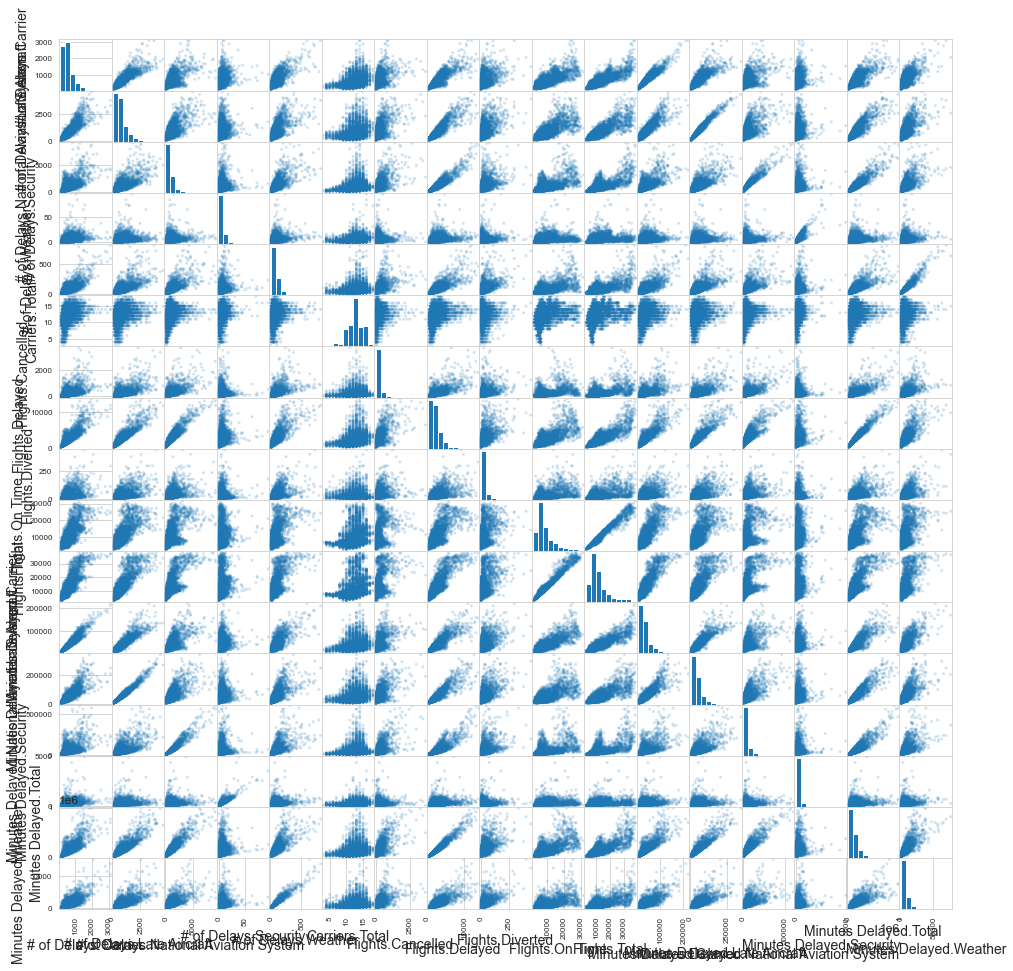

In [52]:
# scatter matrix plot
scatter_matrix(df[col],alpha=0.2,figsize=(16,16))
plt.show() 

In [53]:
# import required libraries 
import pandas as pd 
import seaborn as sb 

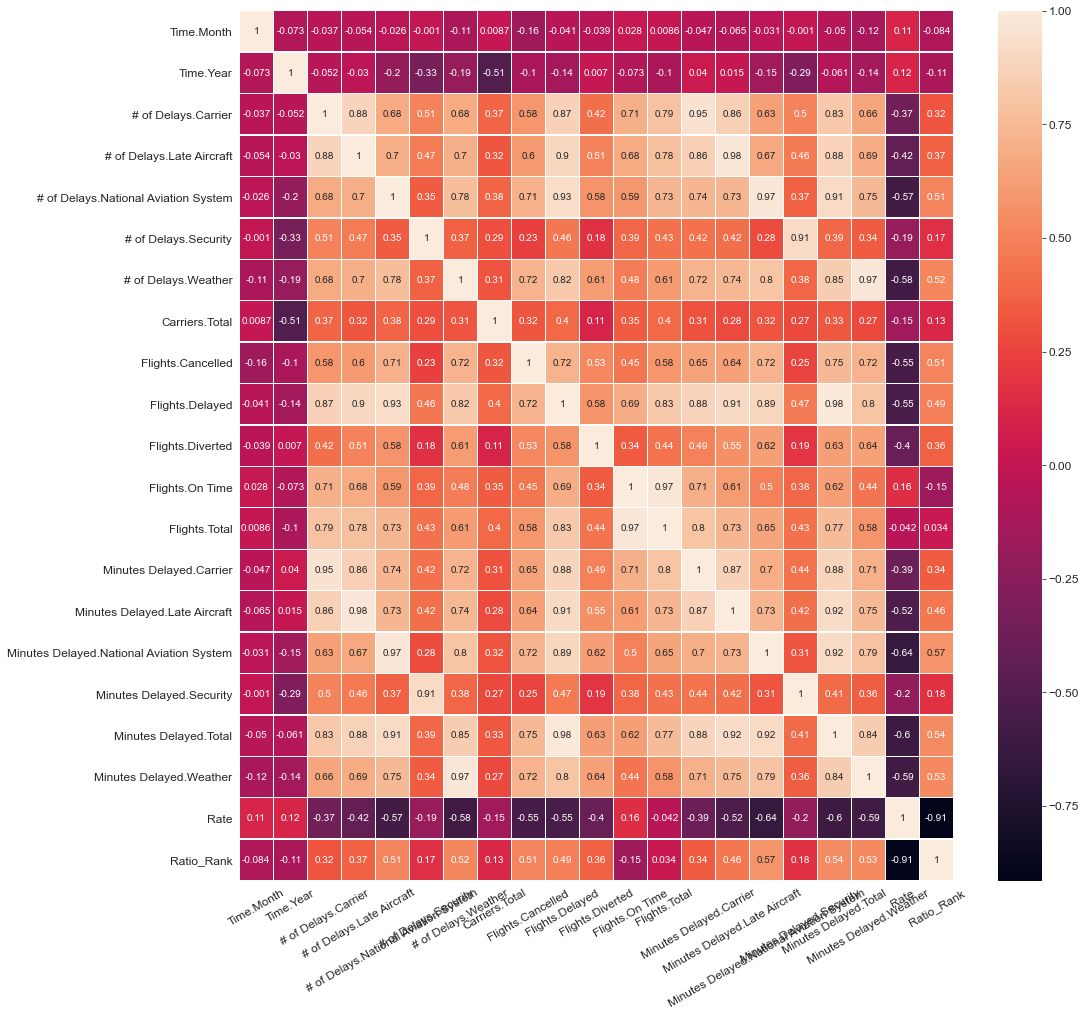

In [54]:
fig, ax = plt.subplots(figsize=(16,16))
sb.heatmap(df.corr(method = 'spearman'),annot=True, linewidths=0.4,annot_kws={'size':10},ax=ax,cbar=True)
plt.xticks(rotation=30)
plt.show()

In [55]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Rate',
       'Ratio_Rank'],
      dtype='object')

In [56]:
df.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,23974,30060,61606,68335,118831,518,268764,19474,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,7875,9639,20319,28189,24400,99,77167,4160,0.816993,1.0
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,6998,8287,13635,26810,17556,278,64480,6201,0.844455,1.0
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,7021,8670,14763,23379,23804,127,65865,3792,0.809804,1.0
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,5321,6513,13775,13712,20999,120,52747,4141,0.816981,1.0


In [57]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']


In [58]:
dfCopy = df.copy()

In [59]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Rate',
       'Ratio_Rank'],
      dtype='object')

In [60]:
dfCopy.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Rate',
       'Ratio_Rank'],
      dtype='object')

In [61]:
def getFiveNumber(df_five, attr):
    Q1 = df_five[attr].quantile(0.25)
    Q3 = df_five[attr].quantile(0.75)
    median =df_five[attr].median()
    IQR = Q3 - Q1
    fence_low = Q1-1.5*IQR
    fence_high = Q3 + 1.5*IQR
    return Q1, Q3, median, fence_low, fence_high

In [62]:
def remove_outlier(df_in, col_name):
    q1, q3, median, fence_low, fence_high = getFiveNumber(df_in, attr)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [63]:
def get_percent_for_five(df_in, attr):
    q1, q3, median, fence_low, fence_high = getFiveNumber(df_in, attr)
    lower = df_in.loc[df_in[attr] <fence_low]
    lo_q1 = df_in.loc[(df_in[attr] < q1) & (df_in[attr] >= fence_low)]
    q1_median = df_in.loc[(df_in[attr] < median) & (df_in[attr] >= q1)]
    median_q3 = df_in.loc[(df_in[attr] < q3) & (df_in[attr] >= median)]
    q3_upper = df_in.loc[(df_in[attr] < fence_high) & (df_in[attr] >= q3)]
    upper = df_in.loc[df_in[attr] >fence_high]
    return lower, lo_q1, q1_median, median_q3, q3_upper,upper
    

In [64]:
df.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,23974,30060,61606,68335,118831,518,268764,19474,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,7875,9639,20319,28189,24400,99,77167,4160,0.816993,1.0
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,6998,8287,13635,26810,17556,278,64480,6201,0.844455,1.0
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,7021,8670,14763,23379,23804,127,65865,3792,0.809804,1.0
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,5321,6513,13775,13712,20999,120,52747,4141,0.816981,1.0


In [65]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather','Rate']

In [66]:
for attr in col:
    rows = df.shape[0]
    lower, lo_q1, q1_median, median_q3, q3_upper,upper = get_percent_for_five(df, attr)
    print(f"The column {attr}")
    print(lower.shape[0]/rows, lo_q1.shape[0]/rows, q1_median.shape[0]/rows, median_q3.shape[0]/rows, q3_upper.shape[0]/rows, upper.shape[0]/rows)
    print("################################\n")

The column # of Delays.Carrier
0.0 0.24977313974591653 0.24909255898366606 0.25090744101633394 0.1896551724137931 0.05966424682395644
################################

The column # of Delays.Late Aircraft
0.0 0.24886569872958259 0.2511343012704174 0.24931941923774956 0.18080762250453722 0.06941923774954628
################################

The column # of Delays.National Aviation System
0.0 0.24818511796733211 0.2518148820326679 0.24977313974591653 0.183983666061706 0.0662431941923775
################################

The column # of Delays.Security
0.0 0.19532667876588022 0.2583938294010889 0.24568965517241378 0.23797640653357532 0.06261343012704174
################################

The column # of Delays.Weather
0.0 0.24319419237749546 0.2554446460980036 0.24750453720508167 0.19941016333938294 0.0544464609800363
################################

The column Carriers.Total
0.019509981851179675 0.1647005444646098 0.1569872958257713 0.3566243194192377 0.3021778584392015 0.0
#############

In [67]:
df.shape

(4408, 26)

In [68]:
rows = df.shape[0]
print(rows)

4408


In [69]:
lower, lo_q1, q1_median, median_q3, q3_upper,upper = get_percent_for_five(df, 'Rate')
lower.shape[0]/rows, lo_q1.shape[0]/rows, q1_median.shape[0]/rows, median_q3.shape[0]/rows, q3_upper.shape[0]/rows, upper.shape[0]/rows

(0.018148820326678767, 0.23185117967332122, 0.25, 0.25, 0.25, 0.0)

In [70]:
df_without_outlier = df.copy()

In [71]:
df.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', '# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Statistics.Carriers.Names', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Rate',
       'Ratio_Rank'],
      dtype='object')

In [72]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [73]:
for attr in col:
    df_without_outlier = remove_outlier(df_without_outlier, attr)

df_without_outlier.shape

(2221, 26)

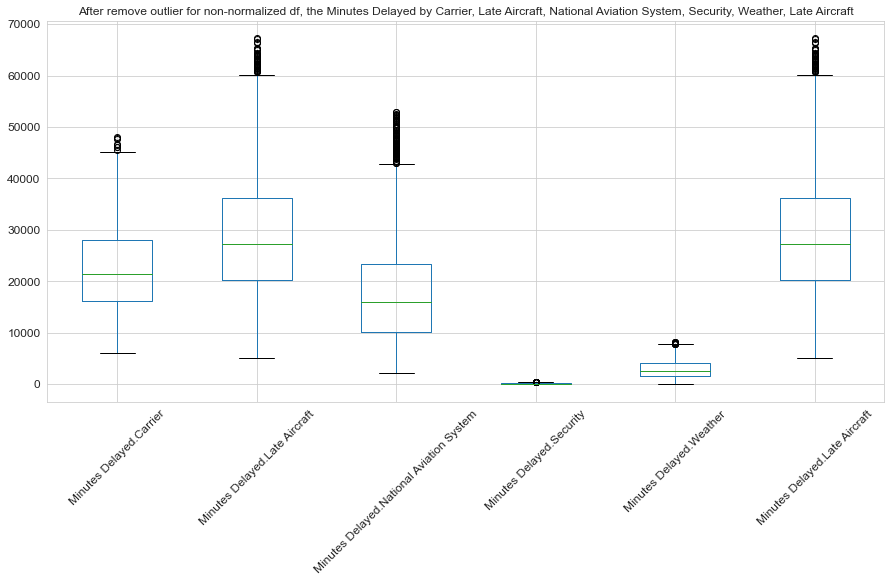

In [74]:
df_without_outlier.boxplot(column=['Minutes Delayed.Carrier',
                        'Minutes Delayed.Late Aircraft',
                        'Minutes Delayed.National Aviation System',
                        'Minutes Delayed.Security',
                        'Minutes Delayed.Weather',
                        'Minutes Delayed.Late Aircraft'], figsize=(15,7), rot = 45)
title_boxplot = 'After remove outlier for non-normalized df, the Minutes Delayed by Carrier, Late Aircraft, National Aviation System, Security, Weather, Late Aircraft'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

In [75]:
from sklearn import preprocessing

min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(dfNormalize[col].values)
final_df = pd.DataFrame(scaled_df, columns=col)
final_df.head(5)

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Carriers.Total,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,0.301513,0.270412,0.350472,0.189474,0.403206,0.533333,0.057928,0.414431,0.061086,0.745664,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219
1,0.088067,0.093018,0.069295,0.042105,0.080148,0.733333,0.036715,0.099881,0.006787,0.199287,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621
2,0.061849,0.088924,0.036424,0.094737,0.094945,0.533333,0.007071,0.071705,0.033937,0.169523,0.161140,0.035474,0.063728,0.025609,0.056173,0.051023,0.080223
3,0.063193,0.087787,0.074847,0.031579,0.065351,0.533333,0.019037,0.095334,0.031674,0.170304,0.171866,0.040725,0.053647,0.036017,0.025662,0.052444,0.048824
4,0.057479,0.041392,0.047307,0.052632,0.070284,0.666667,0.019309,0.060897,0.040724,0.112608,0.111460,0.036125,0.025243,0.031345,0.024247,0.038985,0.053373


In [76]:
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,23974,30060,61606,68335,118831,518,268764,19474,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,7875,9639,20319,28189,24400,99,77167,4160,0.816993,1.0


In [77]:
final_df['Time.Month'] = df['Time.Month']

In [78]:
col = ['# of Delays.Carrier', 'Time.Month', '# of Delays.Late Aircraft',
       '# of Delays.National Aviation System', '# of Delays.Security',
       '# of Delays.Weather', 'Carriers.Total', 'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [79]:
final_df[col]=df[col]

In [80]:
final_df.head(2)

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Carriers.Total,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month
0,1009,1275,3217,17,328,11,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474,6
1,374,495,685,3,66,14,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160,6


In [81]:
final_df.to_csv('../processeddata/new_airlines_Normalized.csv', index=False)

In [82]:
normalized_DF = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
for attr in col:
    normalized_DF = remove_outlier(normalized_DF, attr)
normalized_DF.shape

(2221, 18)

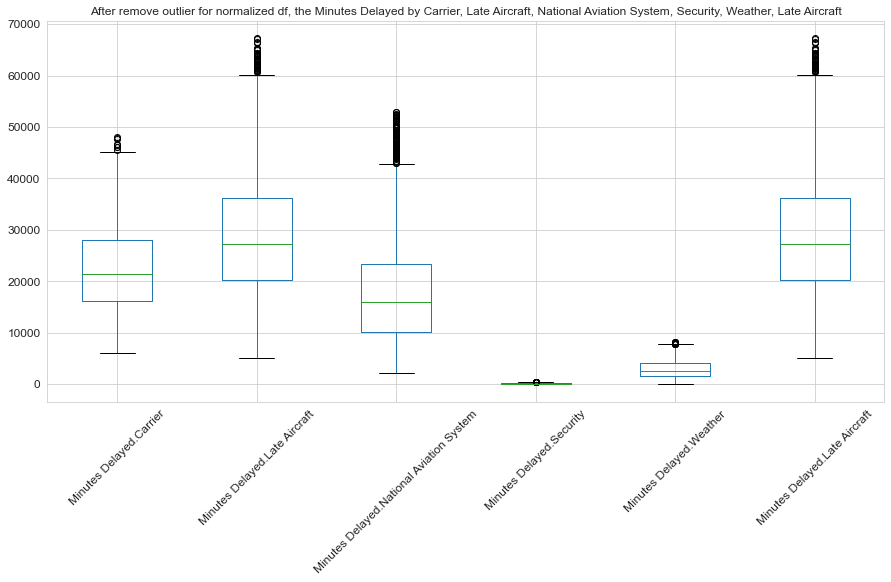

In [83]:
normalized_DF.boxplot(column=['Minutes Delayed.Carrier',
                        'Minutes Delayed.Late Aircraft',
                        'Minutes Delayed.National Aviation System',
                        'Minutes Delayed.Security',
                        'Minutes Delayed.Weather',
                        'Minutes Delayed.Late Aircraft'], figsize=(15,7), rot = 45)

title_boxplot = 'After remove outlier for normalized df, the Minutes Delayed by Carrier, Late Aircraft, National Aviation System, Security, Weather, Late Aircraft'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

<AxesSubplot:>

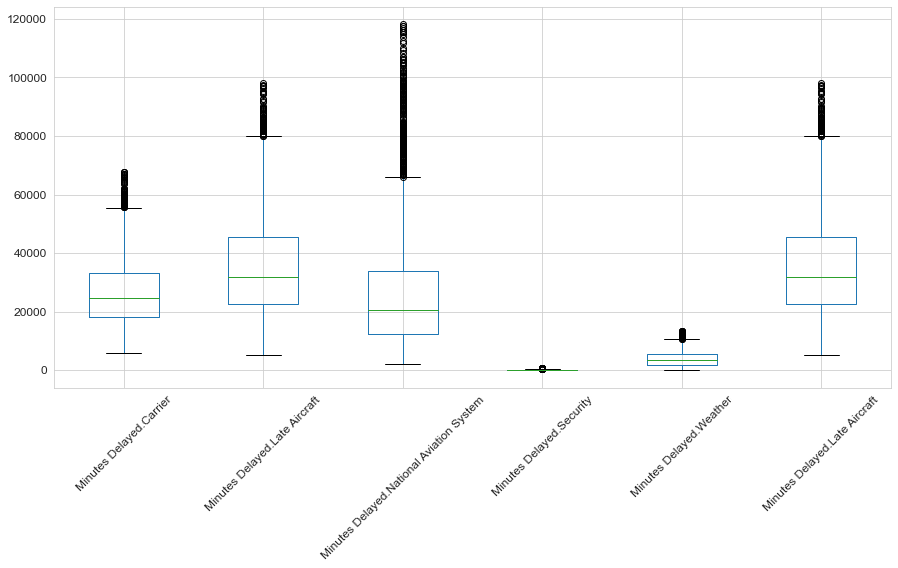

In [84]:
dfBK.boxplot(column=['Minutes Delayed.Carrier',
                        'Minutes Delayed.Late Aircraft',
                        'Minutes Delayed.National Aviation System',
                        'Minutes Delayed.Security',
                        'Minutes Delayed.Weather',
                        'Minutes Delayed.Late Aircraft'], figsize=(15,7), rot = 45)

In [85]:
for attr in col:

    Q1, Q3, median, fence_low, fence_high = getFiveNumber(dfCopy, attr)
    
    dfCopy.loc[ dfCopy[attr] <= Q1, attr] = 0
    dfCopy.loc[(dfCopy[attr] > Q1) & (dfCopy[attr] <= median), attr] = 1
    dfCopy.loc[(dfCopy[attr] > median) & (dfCopy[attr] <= Q3), attr] = 2
    dfCopy.loc[(dfCopy[attr] > Q3), attr] = 3

In [86]:
#dfCopy = dfCopy.drop(['Rate'], axis = 1)

In [87]:
dfCopy.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,1,June,2003,3,3,3,3,...,3,3,3,3,3,3,3,3,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,1,June,2003,1,1,2,1,...,2,1,1,1,1,1,1,1,0.816993,1.0
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,1,June,2003,0,1,0,3,...,1,1,0,1,1,3,0,2,0.844455,1.0
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,1,June,2003,0,1,2,0,...,1,1,0,0,1,1,1,1,0.809804,1.0
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,1,June,2003,0,0,1,1,...,0,0,0,0,1,1,0,1,0.816981,1.0


In [88]:
dfCopy.to_csv('../processeddata/new_airlines_EDA.csv', index=False)

In [89]:
opDF = pd.read_csv('../processeddata/new_airlines_EDA.csv')
           

In [90]:
opDF.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,1,June,2003,3,3,3,3,...,3,3,3,3,3,3,3,3,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,1,June,2003,1,1,2,1,...,2,1,1,1,1,1,1,1,0.816993,1.0
